In [1]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css');

# Source Distribution on an Airfoil

In Lesson 3 of AeroPython, you learned that it is possible to represent potential flow around a circular cylinder using the superposition of a doublet singularity and a free stream. But potential flow is even more powerful: you can represent the flow around any shape. How is it possible, you might ask?

For non-lifting bodies, you can use a source distribution on the body surface, superposed with a free stream. In this assignment, you will build the flow around a NACA0012 airfoil, using a set of sources.

Before you start, take a moment to think: in flow around a symmetric airfoil at $0^{\circ}$ angle of attack,

* Where is the point of maximum pressure?
* What do we call that point?
* Will the airfoil generate any lift?

At the end of this assignment, come back to these questions, and see if it all makes sense.

## Problem Setup
You will read data files containing information about the location and the strength of a set of sources located on the surface of a NACA0012 airfoil.

There are three data files: NACA0012_x.txt, NACA0012_y.txt, and NACA0012_sigma.txt. To load each file into a NumPy array, you need the function numpy.loadtxt. The files should be found in the resources folder of the lessons.

Using 51 mesh points in each direction, and a domain $[-1, 2]\times[-0.5, 0.5]$, compute the velocity due to the set of sources plus a free stream in the $x$-direction with $U_{\infty}=1$. Also compute the coefficient of pressure on your grid points.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm 
%matplotlib inline

In [30]:
N = 51

x0 = np.loadtxt('./resources/NACA0012_x.txt')
y0 = np.loadtxt('./resources/NACA0012_y.txt')
sigma = np.loadtxt('./resources/NACA0012_sigma.txt')


x_start, x_end = -1, 2.0
y_start, y_end = -0.5, 0.5

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

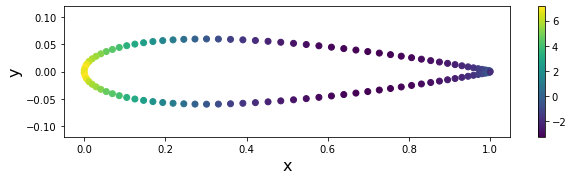

In [31]:
# plot the streamlines
width = 10
height = (np.max(y0) - np.min(y0))/(np.max(x0) - np.min(x0))*width
plt.figure(figsize=(width, 2*height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
# plt.xlim(x_start, x_end)
plt.ylim(2*np.min(y0), 2*np.max(y0))

plt.scatter(x0, y0, c=sigma*1e3)
plt.colorbar()
plt.show()

In [32]:
def get_velocity(sigma, x0, y0, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """    
    
    u = sigma/(2*np.pi)*(X - x0)/((X - x0)**2 + (Y - y0)**2)
    v = sigma/(2*np.pi)*(Y - y0)/((X - x0)**2 + (Y - y0)**2)
    
    return u, v

In [33]:
def get_streamfunction(sigma, x0, y0, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    sigma: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """    
    
    psi = sigma/(2*np.pi)*np.arctan2((Y - y0), (X - x0))
    
    return psi

In [34]:
u_inf = 1.0

u = u_inf*np.ones((N, N), dtype=float)
v = np.zeros((N,N), dtype=float)

psi = u_inf*Y

for s, a, b in zip(sigma, x0, y0):
    u_, v_ = get_velocity(s, a, b, X, Y)
    psi += get_streamfunction(s, a, b, X, Y)
    u += u_
    v += v_
    
np.min((u**2 + v**2)/u_inf**2)

0.5285563386683765

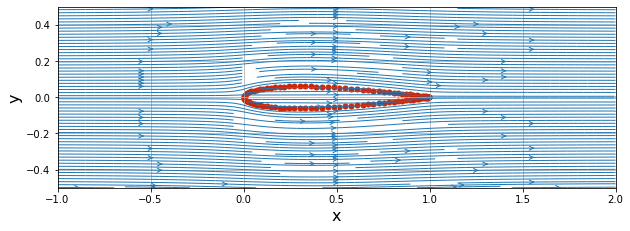

In [36]:
# plot the streamlines
width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(width, height))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x0, y0, color='#CD2305', s=25, marker='o');

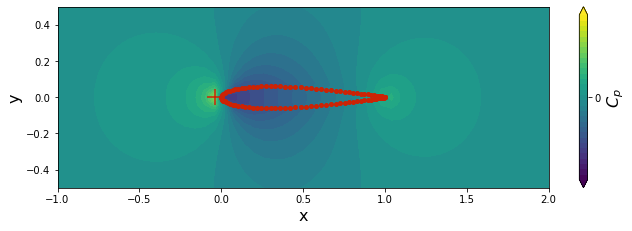

In [63]:
# Calculation of the pressure coeff
Cp = 1 - (u**2 + v**2)/u_inf**2
ind = np.unravel_index(np.argmax(Cp), Cp.shape)

width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(1.1*width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, Cp,
                        levels=np.linspace(-.75, .75, 32), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x0, y0,
               color='#CD2305', s=16, marker='o');
plt.scatter(X[ind], Y[ind],
               color='#CD2305', s=256, marker='+');

In [45]:
print(ind)
Cp[ind]

(25, 16)


0.4714436613316235

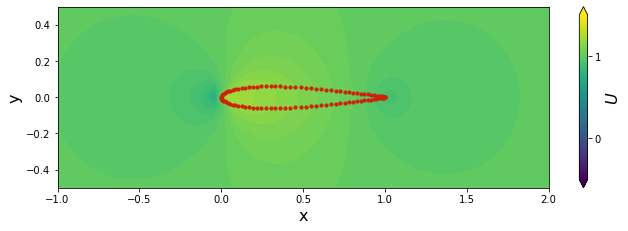

In [53]:
# Calculation of the pressure coeff
U = np.sqrt(u**2 + v**2)/u_inf

width = 10
height = (y_end - y_start)/(x_end - x_start)*width
plt.figure(figsize=(1.1*width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, U,
                        levels=np.linspace(-0.5, 1.5, 64), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label(r'$U$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x0, y0,
               color='#CD2305', s=10, marker='o');